In [1]:
import pandas as pd

#importing training data
Data_train = pd.read_csv('C:/Users/badia/Desktop/AI/Master 2/S3/ML/train.csv')

Data_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1472,0,3.0,0,4,1,20,0.3,169,2,...,443,892,797,6,1,11,1,1,0,0
1496,1868,1,0.5,0,2,1,40,0.9,179,8,...,576,884,298,8,2,17,1,1,0,0
1497,1375,0,2.9,0,2,0,20,0.4,147,6,...,596,679,3847,8,0,12,1,0,1,3
1498,881,0,1.0,0,1,0,64,0.5,160,3,...,115,636,2110,18,9,6,1,1,1,1


In [2]:
len(Data_train.columns)

21

In [3]:
#importing testing data
Data_test = pd.read_csv('C:/Users/badia/Desktop/AI/Master 2/S3/ML/test.csv')

Data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1225,0,0.7,1,6,0,60,0.1,107,2,...,10,1567,2423,17,11,6,1,0,0,2
1,1970,1,0.5,1,0,1,15,1.0,132,2,...,1399,1684,1658,15,9,20,1,1,1,2
2,1186,1,0.5,1,2,0,21,0.4,160,8,...,68,584,2361,17,8,7,1,0,0,1
3,1762,0,0.7,0,7,0,60,0.1,157,4,...,643,790,1380,14,5,14,1,0,0,1
4,1731,1,1.4,1,4,1,4,0.5,163,6,...,809,1988,3892,5,1,4,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
496,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
497,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
498,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
Train_feature = Data_train.drop(columns = "price_range")
Train_label = Data_train.loc[:,"price_range"]

In [5]:
Test_feature = Data_test.drop(columns = "price_range")
Test_label = Data_test.loc[:,"price_range"]


In [6]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc


RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))

#train the model  using training set
RF.fit (Train_feature,Train_label)

#Predict the response for test dataset
y_predict = RF.predict(Test_feature)


pred_prob = RF.predict_proba(Test_feature)


# Confusion Matrix

In [7]:
#extending the classes that we have in our model
import numpy as np
classes = np.unique(Test_label)
classes

array([0, 1, 2, 3], dtype=int64)

In [8]:
#we kno now that we 
Con_Mat = np.zeros((4,4))

for i in range (4):
    for j in range (4):
        for k in range (Test_label.size):
            if((Test_label[k] == i) & (y_predict[k] == j)):
                Con_Mat[i,j] +=1
                
Con_Mat


array([[110.,  15.,   0.,   0.],
       [  5., 108.,  15.,   0.],
       [  0.,  23.,  94.,   9.],
       [  0.,   0.,  11., 110.]])

<AxesSubplot: >

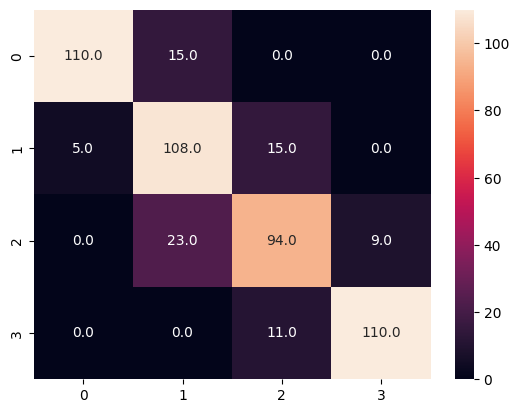

In [9]:
import seaborn as sns
sns.heatmap(Con_Mat,annot=True,fmt = '.1f')

In [10]:
Values = np.zeros((4,4))
Values = pd.DataFrame(Values,columns = ["TP","FP","FN","TN"])

In [11]:
for i in (classes):
    
    Values.values[i,0] = Con_Mat[i,i]                 #TP
    Values.values[i,1] = np.sum(Con_Mat[:,i]) - Con_Mat[i,i]         #FP
    Values.values[i,2] = np.sum(Con_Mat[i]) - Con_Mat[i,i]           #FN
    Values.values[i,3] = np.sum(Con_Mat) - (Values.values[i,0] + Values.values[i,1] + Values.values[i,2])      #TN
Values
    

,TP,FP,FN,TN
0,110.0,5.0,15.0,370.0
1,108.0,38.0,20.0,334.0
2,94.0,26.0,32.0,348.0
3,110.0,9.0,11.0,370.0


In [12]:
Report = np.zeros((4,5))
Report = pd.DataFrame(Report,columns = ["Accuracy","Precision","Recall","Spesifisity","f1-score"])

In [13]:
for i in (classes):
    Report.values[i,0] = (Values.values[i,0] + Values.values[i,3]) / (np.sum(Values.values[i]))    #accuracy = (TP + TN) / All
    Report.values[i,1] = Values.values[i,0] / (Values.values[i,0] + Values.values[i,1])   #Precision = TP / TP + FP
    Report.values[i,2] = Values.values[i,0] / (Values.values[i,0] + Values.values[i,2])   #Recall = TP / TP + FN
    Report.values[i,3] = Values.values[i,3] / (Values.values[i,3] + Values.values[i,1])   #spisifisity = TN /TN + FP
    Report.values[i,4] = (2*Values.values[i,0]) / (2*Values.values[i,0] + Values.values[i,1] + Values.values[i,2])  #f1-score = 2*TP / (2*TP +FP +FN)
    
Report

,Accuracy,Precision,Recall,Spesifisity,f1-score
0,0.960,0.956522,0.880000,0.986667,0.916667
1,0.884,0.739726,0.843750,0.897849,0.788321
2,0.884,0.783333,0.746032,0.930481,0.764228
3,0.960,0.924370,0.909091,0.976253,0.916667


In [14]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix of the model : \n",confusion_matrix(Test_label, y_predict))
print("\n Classification report of the model: \n",classification_report(Test_label, y_predict))

Confusion Matrix of the model : 
 [[110  15   0   0]
 [  5 108  15   0]
 [  0  23  94   9]
 [  0   0  11 110]]

 Classification report of the model: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       125
           1       0.74      0.84      0.79       128
           2       0.78      0.75      0.76       126
           3       0.92      0.91      0.92       121

    accuracy                           0.84       500
   macro avg       0.85      0.84      0.85       500
weighted avg       0.85      0.84      0.85       500



# For the lest question

In [15]:
 pd.DataFrame(pred_prob)

,0,1,2,3
0,0.081818,0.200000,0.645455,0.072727
1,0.060606,0.525253,0.272727,0.141414
2,0.053763,0.408602,0.537634,0.000000
3,0.123288,0.726027,0.109589,0.041096
4,0.046154,0.030769,0.207692,0.715385
...,...,...,...,...
495,0.530435,0.286957,0.130435,0.052174
496,0.043011,0.440860,0.440860,0.075269
497,0.025424,0.033898,0.254237,0.686441
498,0.814433,0.154639,0.020619,0.010309


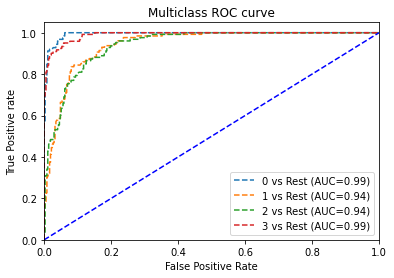

In [15]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(Test_label,classes=np.unique(Test_label))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 4

for i in (classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
#plt.rcParams["figure.figsize"]=(15,10)
plt.show()

In [15]:
thresholds = np.array(list(range(0,100,1)))/100
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

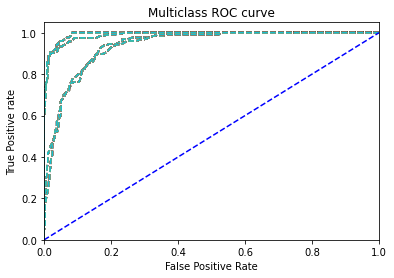

In [24]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize


for i in classes:
    roc_point = [] 
    
    for thre in thresholds:
        
        tp=0; fp=0; tn=0; fn=0 
        
        for j in range(500):
            
            if((pred_prob[:,i])[j] >= thre):
                predection_class = i
            else:
                predection_class = 4
            
            if Test_label[j] ==i and predection_class == i  :
                tp += 1
            elif Test_label[j] == i and predection_class != i:
                fn += 1
            elif Test_label[j] != i and predection_class == i: 
                fp += 1
            elif Test_label[j] != i and predection_class != i:
                tn += 1
                
        tpr = tp / (tp + fn)
        fpr = 1 - (tn / (tn + fp))
                   
        #print(tpr,fpr)
        
        roc_point.append([fpr,tpr])
        
        pivot = pd.DataFrame(roc_point, columns = ["fpr", "tpr"])
        plt.plot(pivot.fpr, pivot.tpr, '--')
        
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.show()
        

                

In [176]:
pivot

,fpr,tpr
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
95,0.0,0.0
96,0.0,0.0
97,0.0,0.0
98,0.0,0.0
